In [14]:
#Data preparation

#Importing libraries used, and read Boston Airbnb listings data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
df = pd.read_csv('./data/boston_airbnb/listings.csv')

#Remove columns with more than 50% missing values
missing_cols = set(df.columns[df.isnull().mean()>0.5])
df = df.drop(missing_cols, axis=1, inplace=False)

#Replace "$" sign in price column, convert to numeric
df['price'] = df['price'].replace({'\$':''}, regex = True)
df['price'] = pd.to_numeric(df['price'] ,errors='coerce')

#Drop rows with null prices
df.dropna(subset=['price'], axis=0)

#Drop rows with prices more than $400
df = df[df['price']<=400]

#Display number of rows and columns, and the column names of the remaining data
print(df.shape)
print(df.columns)

(3459, 86)
Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'transit', 'access', 'interaction', 'house_rules', 'thumbnail_url',
       'medium_url', 'picture_url', 'xl_picture_url', 'host_id', 'host_url',
       'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed', 'city', 'state', 'zipcode',
       'market', 'smart_location', 'country_code', 'country', 'latitude',
       'longitude', 'is_location_exact', 'property_type', 'room_type',
       'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type',
    

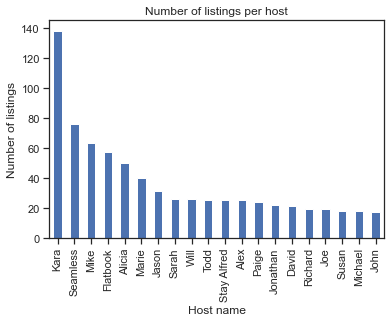

In [15]:
#Get the total number of listings per host and plot on a bar chart for the top 20 hosts
vals = df['host_name'].value_counts()
((vals[:20])).plot(kind="bar", title="Number of listings per host", xlabel="Host name", ylabel="Number of listings");

In [16]:
#Display the total number of listings per host
print(vals)

Kara         138
Seamless      76
Mike          63
Flatbook      57
Alicia        50
            ... 
Chuanyang      1
Dar            1
Arnaud         1
Kristine       1
Olga           1
Name: host_name, Length: 1299, dtype: int64


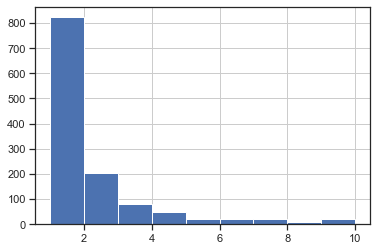

In [17]:
#Display a histogram of the total number of listings per host, setting the bins from 1 to 10 in steps of 1
vals.hist(bins=[1,2,3,4,5,6,7,8,9,10]);

In [18]:
#Filter the data to in include hosts with more than one listing only
df_1 = df.groupby('host_name').filter(lambda x: len(x) > 1) 

#Get the number of listings, mean listing price, and mean review score per host
df_1 = df_1.groupby(['host_name']).agg({'id':"count", 'price':"mean", 'review_scores_rating':"mean"})

#Rename the id column to count that contains the number of listings per host
df_1 = df_1.rename(columns={'id': 'count'},inplace=False)

#Sort the data in descending order by the number of listings per host
df_1 = df_1.sort_values("count", ascending=False)

#Display the data
print(df_1)

              count       price  review_scores_rating
host_name                                            
Kara            138  235.789855             85.096154
Seamless         76  296.868421             88.634921
Mike             63  277.126984             89.163265
Flatbook         57  213.894737             91.256410
Alicia           50  152.500000             91.361111
...             ...         ...                   ...
Jenna             2  141.000000                   NaN
Jeremy            2   91.000000             95.500000
Jill              2  192.500000             99.500000
Jim & Afiyah      2   72.500000             88.000000
英硕                2   75.000000                   NaN

[476 rows x 3 columns]


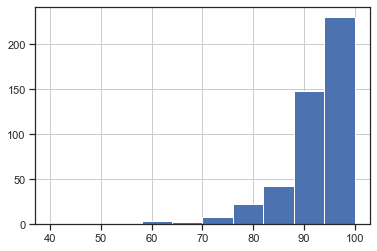

In [19]:
#Display a histogram of mean review score per host
df_1['review_scores_rating'].hist();

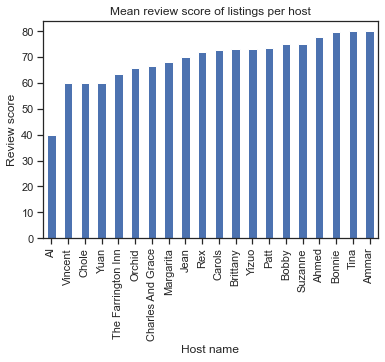

In [20]:
#Plot the mean review score per host in ascending order for the 20 hosts with the lowest scores
df_1 = df_1.sort_values("review_scores_rating", ascending=True)
((df_1['review_scores_rating'][:20])).plot(kind="bar", title="Mean review score of listings per host", xlabel="Host name", ylabel="Review score");

In [21]:
#Display the data sorted by review scores in ascending order
print(df_1.head(10))

                    count       price  review_scores_rating
host_name                                                  
Al                      2  119.500000             40.000000
Vincent                 2   79.000000             60.000000
Chole                   2  118.500000             60.000000
Yuan                    2   41.500000             60.000000
The Farrington Inn      4  136.250000             63.333333
Orchid                 15   58.066667             65.785714
Charles And Grace       5  130.000000             66.666667
Margarita               2   75.000000             68.000000
Jean                    5   55.000000             70.000000
Rex                     2   70.000000             72.000000


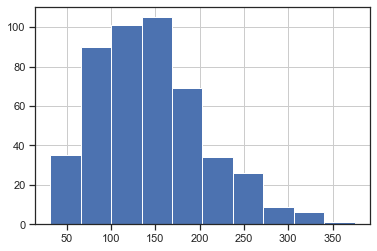

In [22]:
#Display a histogram of mean price per host
df_1['price'].hist();

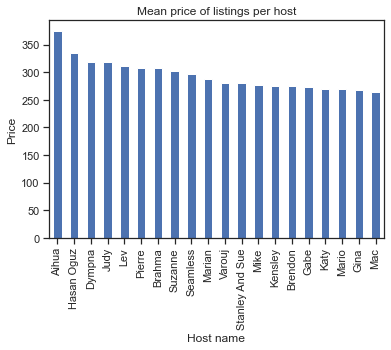

In [23]:
#Plot the mean price per host in descending order of the 20 hosts with the highest mean prices
df_1 = df_1.sort_values("price", ascending=False)
((df_1['price'][:20])).plot(kind="bar", title="Mean price of listings per host", xlabel="Host name", ylabel="Price");

In [24]:
#Sort and displaythe data mean price per host in descending order
df_1 = df_1.sort_values("price", ascending=False)
print(df_1.head(20))

                 count       price  review_scores_rating
host_name                                               
Aihua                2  375.000000             80.500000
Hasan Oguz           2  335.500000             97.500000
Dympna               4  318.250000            100.000000
Judy                 2  317.500000             95.000000
Lev                  2  311.500000             98.500000
Pierre               4  307.500000                   NaN
Brahma               3  306.666667             92.000000
Suzanne              2  302.500000             75.000000
Seamless            76  296.868421             88.634921
Marian               2  287.500000             96.500000
Varouj               2  280.000000             97.000000
Stanley And Sue      5  280.000000             90.800000
Mike                63  277.126984             89.163265
Kensley              3  275.000000             84.000000
Brendon              2  274.500000             92.000000
Gabe                 2  272.500

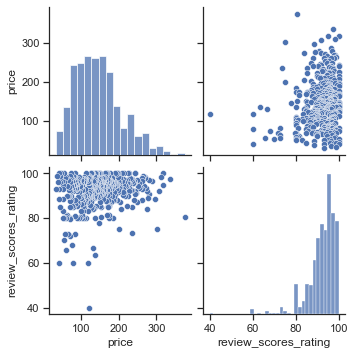

In [25]:
#Plot the mean price and review scores per host against each other
sns.set_theme(style="ticks")
sns.pairplot(df_1[['price','review_scores_rating']]);


In [26]:
#Display the descriptive statistics of the number of listings, mean price and mean review score per host
df_1.describe()

,count,price,review_scores_rating
count,476.000000,476.000000,460.000000
mean,5.537815,143.952973,92.102598
std,9.330687,60.839745,7.109249
min,2.000000,31.500000,40.000000
25%,2.000000,99.136364,89.898485
50%,3.000000,137.500000,93.928571
75%,6.000000,176.250000,96.517857
max,138.000000,375.000000,100.000000
